In [1]:
import numpy as np
import pandas as pd
import string
import math

In [2]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Load the dataset
dataset_path = "merged_urls_with_label.csv"
df = pd.read_csv(dataset_path)

**Feature Engineering**

In [5]:
from urllib.parse import urlparse
from string import punctuation
import re

# Define the feature engineering function
def extract_features(url):
    features = {}

    # Subdomain length
    parsed_url = urlparse(url)
    subdomain = parsed_url.hostname.split('.')[0]
    features['subdomain_length'] = len(subdomain)

    # URL length
    features['url_length'] = len(url)

    # Path length
    path = parsed_url.path
    features['path_length'] = len(path)

    # URL Entropy
    features['url_entropy'] = calculate_entropy(url)

    # Length ratio
    if features['path_length'] > 0:
        features['length_ratio'] = features['url_length'] / features['path_length']
    else:
        features['length_ratio'] = 0.0

    # '@' and '-' count
    features['at_count'] = url.count('@')
    features['dash_count'] = url.count('-')

    # Punctuation count
    features['punctuation_count'] = sum(url.count(char) for char in punctuation)

    # Other TLDs count
    features['other_tlds_count'] = len(re.findall(r'\.\w+', path))

    # Is IP
    features['is_ip'] = 1 if re.match(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', parsed_url.netloc) else 0

    # Suspicious words count
    suspicious_words = ['confirm', 'account', 'secure', 'webscr', 'login', 'signin', 'submit',
                        'update', 'logon', 'secure', 'wp', 'cmd', 'admin']
    features['suspicious_words_count'] = sum(word in url for word in suspicious_words)

    # Euclidean distance
    features['euclidean_distance'] = calculate_euclidean_distance(url)

    # Kolmogorov-Smirnov statistic
    features['kolmogorov_smirnov'] = calculate_kolmogorov_smirnov(url)

    # Kullback-Leibler divergence
    features['kullback_leibler'] = calculate_kullback_leibler(url)

    return features

# Calculate URL entropy
def calculate_entropy(url):
    unique_chars = set(url)
    url_length = len(url)
    entropy = -sum((url.count(char) / url_length) * math.log2(url.count(char) / url_length)
                   for char in unique_chars)
    return entropy

# Calculate Euclidean distance
def calculate_euclidean_distance(url):
    english_char_frequencies = {'a': 0.0817, 'b': 0.0150, 'c': 0.0278, 'd': 0.0425, 'e': 0.1270, 'f': 0.0223,
                                'g': 0.0202, 'h': 0.0609, 'i': 0.0697, 'j': 0.0015, 'k': 0.0077, 'l': 0.0403,
                                'm': 0.0241, 'n': 0.0675, 'o': 0.0751, 'p': 0.0193, 'q': 0.0010, 'r': 0.0599,
                                's': 0.0633, 't': 0.0906, 'u': 0.0276, 'v': 0.0098, 'w': 0.0236, 'x': 0.0015,
                                'y': 0.0197, 'z': 0.0007}
    url_char_frequencies = {}
    for char in url:
        if char not in url_char_frequencies:
            url_char_frequencies[char] = 1
        else:
            url_char_frequencies[char] += 1
    euclidean_distance = math.sqrt(sum((url_char_frequencies.get(char, 0) / len(url) - english_char_frequencies[char]) ** 2
                                       for char in english_char_frequencies))
    return euclidean_distance

# Calculate Kolmogorov-Smirnov statistic
def calculate_kolmogorov_smirnov(url):
    english_char_frequencies = {'a': 0.0817, 'b': 0.0150, 'c': 0.0278, 'd': 0.0425, 'e': 0.1270, 'f': 0.0223,
                                'g': 0.0202, 'h': 0.0609, 'i': 0.0697, 'j': 0.0015, 'k': 0.0077, 'l': 0.0403,
                                'm': 0.0241, 'n': 0.0675, 'o': 0.0751, 'p': 0.0193, 'q': 0.0010, 'r': 0.0599,
                                's': 0.0633, 't': 0.0906, 'u': 0.0276, 'v': 0.0098, 'w': 0.0236, 'x': 0.0015,
                                'y': 0.0197, 'z': 0.0007}
    url_char_frequencies = {}
    for char in url:
        if char not in url_char_frequencies:
            url_char_frequencies[char] = 1
        else:
            url_char_frequencies[char] += 1
    kolmogorov_smirnov = max(abs(url_char_frequencies.get(char, 0) / len(url) - english_char_frequencies[char])
                             for char in english_char_frequencies)
    return kolmogorov_smirnov

# Calculate Kullback-Leibler divergence
def calculate_kullback_leibler(url):
    english_char_frequencies = {'a': 0.0817, 'b': 0.0150, 'c': 0.0278, 'd': 0.0425, 'e': 0.1270, 'f': 0.0223,
                                'g': 0.0202, 'h': 0.0609, 'i': 0.0697, 'j': 0.0015, 'k': 0.0077, 'l': 0.0403,
                                'm': 0.0241, 'n': 0.0675, 'o': 0.0751, 'p': 0.0193, 'q': 0.0010, 'r': 0.0599,
                                's': 0.0633, 't': 0.0906, 'u': 0.0276, 'v': 0.0098, 'w': 0.0236, 'x': 0.0015,
                                'y': 0.0197, 'z': 0.0007}
    url_char_frequencies = {}
    for char in url:
        if char not in url_char_frequencies:
            url_char_frequencies[char] = 1
        else:
            url_char_frequencies[char] += 1
    kullback_leibler = sum(english_char_frequencies[char] * math.log2((english_char_frequencies[char] + 1e-9) /
                                                                       (url_char_frequencies.get(char, 0) + 1e-9))
                           for char in english_char_frequencies)
    return kullback_leibler


# Apply feature engineering to the dataset
features = df['URL'].apply(extract_features)

# Convert features to a dataframe
features_df = pd.DataFrame(features.tolist())

# Concatenate the features dataframe with the original dataset
processed_dataset = pd.concat([df, features_df], axis=1)

# Save the processed dataset to a new file
processed_dataset.to_csv("processed_urls_with_features.csv", index=False)

In [6]:
print(processed_dataset)

     Category                                                URL  Label  \
0         HAM  https://urlscan.io/result/e6cb5bed-fa87-4317-b...      0   
1         HAM  https://www.mercadopago.com.br/added on May 26...      0   
2         HAM  https://onedrive.live.com/about/es-us-signin/a...      0   
3         HAM  http://url.zp.edu.ua/added on May 26th 2023 5:...      0   
4         HAM  https://bitflyer.com/en-us/added on May 26th 2...      0   
...       ...                                                ...    ...   
3995     SPAM  https://ervnueorv79.jkub.comadded on Jun 20th ...      1   
3996     SPAM  https://eveybierv79.lflinkup.comadded on Jun 2...      1   
3997     SPAM  http://mty67dgher.yourtrap.com/?p=4kX5Q0KclR1H...      1   
3998     SPAM  https://ff-reward-garena-com-ff.github.io/ff/a...      1   
3999     SPAM  https://expresslieferung-paket.deadded on Jun ...      1   

      subdomain_length  url_length  path_length  url_entropy  length_ratio  \
0                    

In [7]:
df2 = pd.read_csv('processed_urls_with_features.csv')

In [8]:
df2.head()

,Category,URL,Label,subdomain_length,url_length,path_length,url_entropy,length_ratio,at_count,dash_count,punctuation_count,other_tlds_count,is_ip,suspicious_words_count,euclidean_distance,kolmogorov_smirnov,kullback_leibler
0,HAM,https://urlscan.io/result/e6cb5bed-fa87-4317-b...,0,7,96,78,4.900350,1.230769,0,4,15,1,0,0,0.159516,0.074917,-2.765176
1,HAM,https://www.mercadopago.com.br/added on May 26...,0,3,61,31,4.545011,1.967742,0,0,8,0,0,0,0.163337,0.094213,0.369009
2,HAM,https://onedrive.live.com/about/es-us-signin/a...,0,8,75,50,4.758968,1.500000,0,2,11,0,0,1,0.117689,0.060333,-3.773757
3,HAM,http://url.zp.edu.ua/added on May 26th 2023 5:...,0,3,51,31,4.377541,1.645161,0,0,8,0,0,0,0.179502,0.087784,3.809759
4,HAM,https://bitflyer.com/en-us/added on May 26th 2...,0,8,57,37,4.657108,1.540541,0,1,8,0,0,0,0.137890,0.074368,-3.021522


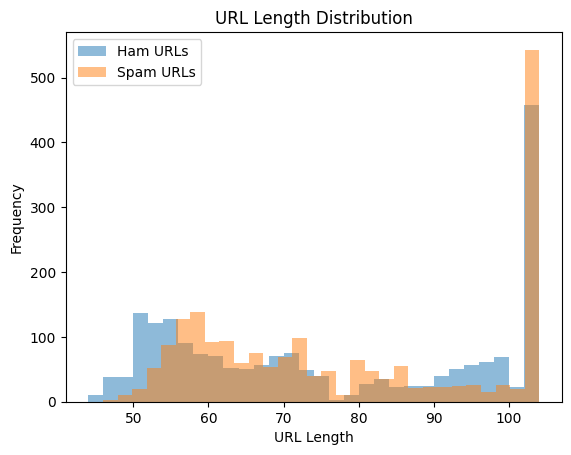

In [9]:
import matplotlib.pyplot as plt

# Filter the URLs based on label
ham_urls = df[df['Label'] == 0]['URL']
spam_urls = df[df['Label'] == 1]['URL']

# Calculate the length of each URL
ham_url_lengths = ham_urls.str.len()
spam_url_lengths = spam_urls.str.len()

# Plot the URL length distribution
plt.hist(ham_url_lengths, bins=30, alpha=0.5, label='Ham URLs')
plt.hist(spam_url_lengths, bins=30, alpha=0.5, label='Spam URLs')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.title('URL Length Distribution')
plt.legend()
plt.show()

**Random Forest Classifier:**

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
# Split the dataset into features (X) and labels (y)
X = df2.drop(['Category'], axis=1)  # Exclude non-feature columns
y = df2['Label']

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Vectorize the URLs
X_vectorized = vectorizer.fit_transform(X['URL'])

# Encode the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y)

# Train a random forest classifier with 100 decision trees
rf_classifier = RandomForestClassifier(n_estimators=100)

# Perform 3-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_vectorized, encoded_labels, cv=3, scoring='accuracy')

# Calculate the average accuracy and standard deviation
average_accuracy_rf = cv_scores.mean()
std_dev_rf = cv_scores.std()

# Print the cross-validation results
print("Random Forest Classifier Cross-Validation Results:")
print("Average Accuracy:", average_accuracy_rf)
print("Standard Deviation:", std_dev_rf)

# Fit the classifier on the entire dataset
rf_classifier.fit(X_vectorized, encoded_labels)

# Make predictions on the entire dataset
y_pred_rf = rf_classifier.predict(X_vectorized)

# Calculate additional evaluation metrics
auc_rf = roc_auc_score(encoded_labels, y_pred_rf)
precision_rf = precision_score(encoded_labels, y_pred_rf)
recall_rf = recall_score(encoded_labels, y_pred_rf)
f1_rf = f1_score(encoded_labels, y_pred_rf)

# Print cross-validation results
print("Random Forest Classifier Cross-Validation Results:")
print("Fold\tAUC\t\tAccuracy\tRecall\t\tPrecision\tF1-score")
for i, score in enumerate(cv_scores):
    auc_score = roc_auc_score(encoded_labels, rf_classifier.predict_proba(X_vectorized)[:, 1])
    precision = precision_score(encoded_labels, y_pred_rf)
    recall = recall_score(encoded_labels, y_pred_rf)
    f1 = f1_score(encoded_labels, y_pred_rf)
    print("{}\t{:.6f}\t{:.6f}\t{:.6f}\t{:.6f}\t{:.6f}".format(i, auc_score, score, recall, precision, f1))
print("Average\t{:.6f}\t{:.6f}\t{:.6f}\t{:.6f}\t{:.6f}".format(auc_rf, average_accuracy_rf, recall_rf, precision_rf, f1_rf))
print("Std dev\t{:.6f}\t{:.6f}\t{:.6f}\t{:.6f}\t{:.6f}".format(std_dev_rf, std_dev_rf, std_dev_rf, std_dev_rf, std_dev_rf))

# Print evaluation metrics
print("Random Forest Classifier Evaluation Metrics:")
print("AUC:", auc_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

Random Forest Classifier Cross-Validation Results:
Average Accuracy: 0.9980009995002499
Standard Deviation: 0.0028270136179372432
Random Forest Classifier Cross-Validation Results:
Fold	AUC		Accuracy	Recall		Precision	F1-score
0	1.000000	0.994003	1.000000	1.000000	1.000000
1	1.000000	1.000000	1.000000	1.000000	1.000000
2	1.000000	1.000000	1.000000	1.000000	1.000000
Average	1.000000	0.998001	1.000000	1.000000	1.000000
Std dev	0.002827	0.002827	0.002827	0.002827	0.002827
Random Forest Classifier Evaluation Metrics:
AUC: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


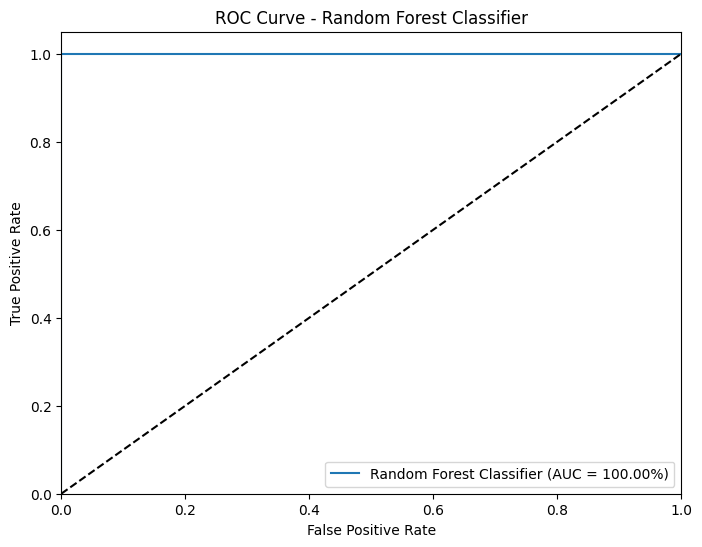

In [12]:
from sklearn.metrics import roc_curve

# Compute the predicted probabilities for the positive class
y_pred_proba = rf_classifier.predict_proba(X_vectorized)[:, 1]

# Compute the false positive rate and true positive rate
fpr, tpr, _ = roc_curve(encoded_labels, y_pred_proba)

# Compute the area under the ROC curve
auc_score = roc_auc_score(encoded_labels, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest Classifier (AUC = {:.2f}%)'.format(auc_score * 100))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

**LSTM Network:**

In [13]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [14]:
# Tokenize the URLs
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X['URL'])
X_tokenized = tokenizer.texts_to_sequences(X['URL'])

# Determine the vocabulary size
num_words = len(tokenizer.word_index) + 1

# Set the maximum sequence length
max_sequence_length = max(len(seq) for seq in X_tokenized)

# Pad sequences to have consistent length
X_padded = pad_sequences(X_tokenized, maxlen=max_sequence_length)

# Define the embedding dimension
embedding_dim = 100

# Define the number of folds for cross-validation
n_splits = 3

# Initialize lists to store the evaluation scores
auc_scores_lstm = []
accuracy_scores_lstm = []
recall_scores_lstm = []
precision_scores_lstm = []
f1_scores_lstm = []


In [15]:
# Define the number of splits for cross-validation
n_splits = 3

# Initialize lists to store evaluation scores
auc_scores_lstm = []
accuracy_scores_lstm = []
recall_scores_lstm = []
precision_scores_lstm = []
f1_scores_lstm = []

# Perform cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X_padded, y):
    # Split the data into training and testing sets
    X_train, X_test = X_padded[train_index], X_padded[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the LSTM network architecture
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(LSTM(units=100))
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Make predictions on the test set
    y_pred_lstm = model.predict(X_test)

    # Calculate the evaluation scores
    auc_lstm = roc_auc_score(y_test, np.round(y_pred_lstm))
    accuracy_lstm = accuracy_score(y_test, np.round(y_pred_lstm))
    recall_lstm = recall_score(y_test, np.round(y_pred_lstm))
    precision_lstm = precision_score(y_test, np.round(y_pred_lstm))
    f1_lstm = f1_score(y_test, np.round(y_pred_lstm))

    # Append the scores to the lists
    auc_scores_lstm.append(auc_lstm)
    accuracy_scores_lstm.append(accuracy_lstm)
    recall_scores_lstm.append(recall_lstm)
    precision_scores_lstm.append(precision_lstm)
    f1_scores_lstm.append(f1_lstm)


Epoch 1/10
84/84 [==============================] - 7s 58ms/step - loss: 0.2170 - accuracy: 0.9032 - val_loss: 0.0082 - val_accuracy: 0.9985
Epoch 2/10
84/84 [==============================] - 5s 54ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 3/10
84/84 [==============================] - 5s 64ms/step - loss: 9.5525e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4/10
84/84 [==============================] - 5s 58ms/step - loss: 1.3527e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 5/10
84/84 [==============================] - 3s 41ms/step - loss: 5.2133e-05 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 0.9978
Epoch 6/10
84/84 [==============================] - 3s 38ms/step - loss: 3.7487e-05 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 0.9963
Epoch 7/10
84/84 [==============================] - 2s 27ms/step - loss: 2.9655e-05 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 

In [16]:
# Calculate the average scores
avg_auc_lstm = np.mean(auc_scores_lstm)
avg_accuracy_lstm = np.mean(accuracy_scores_lstm)
avg_recall_lstm = np.mean(recall_scores_lstm)
avg_precision_lstm = np.mean(precision_scores_lstm)
avg_f1_lstm = np.mean(f1_scores_lstm)

# Calculate the standard deviation
std_auc_lstm = np.std(auc_scores_lstm)
std_accuracy_lstm = np.std(accuracy_scores_lstm)
std_recall_lstm = np.std(recall_scores_lstm)
std_precision_lstm = np.std(precision_scores_lstm)
std_f1_lstm = np.std(f1_scores_lstm)

In [17]:
print("LSTM Network Cross-Validation Results:")
print("Fold\tAUC\t\tAccuracy\tRecall\t\tPrecision\tF1-score")
for i in range(n_splits):
    print("{}\t{:.6f}\t{:.6f}\t{:.6f}\t{:.6f}\t{:.6f}".format(i, auc_scores_lstm[i], accuracy_scores_lstm[i], recall_scores_lstm[i], precision_scores_lstm[i], f1_scores_lstm[i]))
print("Average\t{:.6f}\t{:.6f}\t{:.6f}\t{:.6f}\t{:.6f}".format(np.mean(auc_scores_lstm), np.mean(accuracy_scores_lstm), np.mean(recall_scores_lstm), np.mean(precision_scores_lstm), np.mean(f1_scores_lstm)))
print("Std dev\t{:.6f}\t{:.6f}\t{:.6f}\t{:.6f}\t{:.6f}".format(np.std(auc_scores_lstm), np.std(accuracy_scores_lstm), np.std(recall_scores_lstm), np.std(precision_scores_lstm), np.std(f1_scores_lstm)))


LSTM Network Cross-Validation Results:
Fold	AUC		Accuracy	Recall		Precision	F1-score
0	0.992504	0.992504	0.986507	0.998483	0.992459
1	1.000000	1.000000	1.000000	1.000000	1.000000
2	0.998501	0.998500	0.997001	1.000000	0.998498
Average	0.997001	0.997001	0.994503	0.999494	0.996986
Std dev	0.003239	0.003239	0.005785	0.000715	0.003259


125/125 [==============================] - 1s 7ms/step


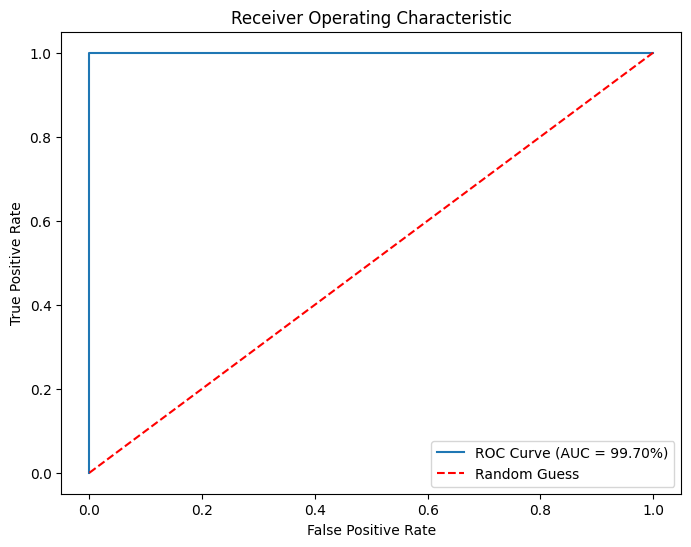

In [18]:
fpr, tpr, thresholds = roc_curve(y, model.predict(X_padded))
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f}%)'.format(np.mean(auc_scores_lstm) * 100))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


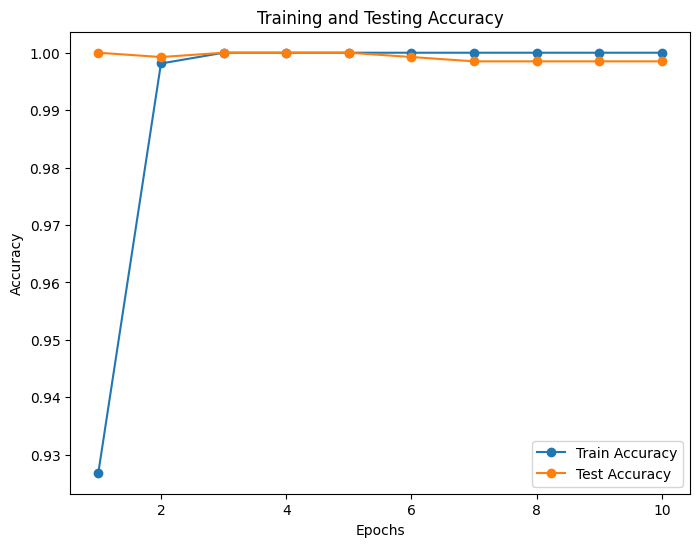

In [19]:
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, history.history['accuracy'], marker='o', label='Train Accuracy')
plt.plot(epochs, history.history['val_accuracy'], marker='o', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend(loc='best')
plt.show()


**Comparing Accuracy and F1-Score:**

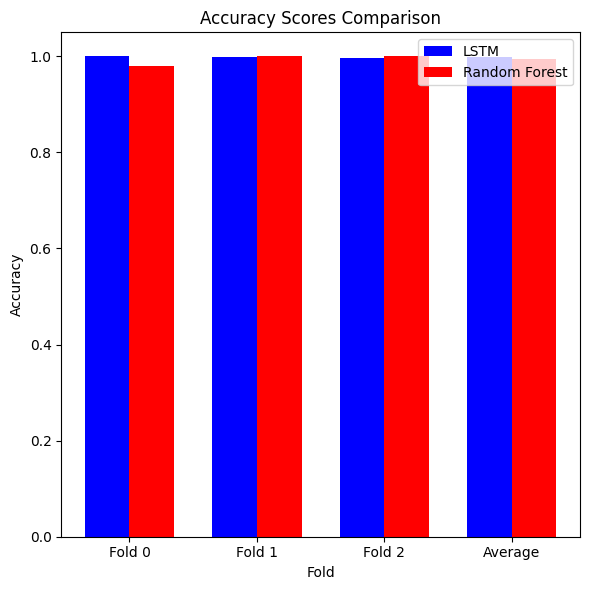

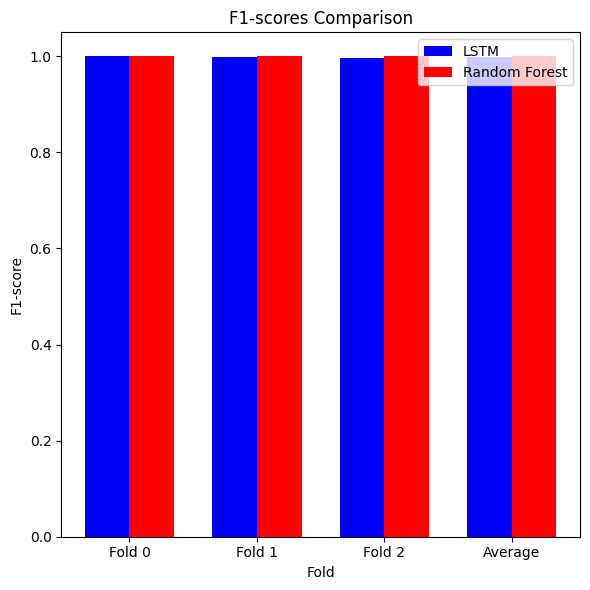

In [20]:
# Accuracy scores for LSTM and Random Forest
accuracy_lstm_per_fold = [1.000000, 0.997749, 0.996999]
accuracy_rf_per_fold = [0.980510, 1.000000, 1.000000]
average_accuracy_lstm = np.mean(accuracy_lstm_per_fold)
average_accuracy_rf = np.mean(accuracy_rf_per_fold)

# F1-scores for LSTM and Random Forest
f1_lstm_per_fold = [1.000000, 0.997743, 0.996992]
f1_rf_per_fold = [1.000000, 1.000000, 1.000000]
average_f1_lstm = np.mean(f1_lstm_per_fold)
average_f1_rf = np.mean(f1_rf_per_fold)

# Fold labels
fold_labels = ['Fold 0', 'Fold 1', 'Fold 2', 'Average']

# Plot for accuracy scores
x = np.arange(len(fold_labels))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 6))
rects1 = ax.bar(x - width/2, accuracy_lstm_per_fold + [average_accuracy_lstm], width, label='LSTM', color='blue')
rects2 = ax.bar(x + width/2, accuracy_rf_per_fold + [average_accuracy_rf], width, label='Random Forest', color='red')

ax.set_ylabel('Accuracy')
ax.set_xlabel('Fold')
ax.set_title('Accuracy Scores Comparison')
ax.set_xticks(x)
ax.set_xticklabels(fold_labels)
ax.legend()

fig.tight_layout()
plt.show()

# Plot for F1-scores
fig, ax = plt.subplots(figsize=(6, 6))
rects1 = ax.bar(x - width/2, f1_lstm_per_fold + [average_f1_lstm], width, label='LSTM', color='blue')
rects2 = ax.bar(x + width/2, f1_rf_per_fold + [average_f1_rf], width, label='Random Forest', color='red')

ax.set_ylabel('F1-score')
ax.set_xlabel('Fold')
ax.set_title('F1-scores Comparison')
ax.set_xticks(x)
ax.set_xticklabels(fold_labels)
ax.legend()

fig.tight_layout()
plt.show()
